## **Import the libraries **

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  

In [3]:
#read data as hs_data
url = "http://bit.ly/w-data"
hs_data = pd.read_csv(url)
hs_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Generic display of data as a graph using plot

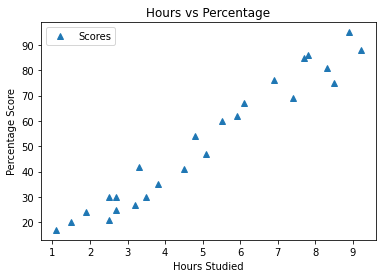

In [4]:
hs_data.plot(x='Hours', y='Scores', style='^')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## store hours and scores as numpyarray and print them

In [8]:
x_arr=np.array(hs_data.Hours).reshape(-1,1)
y_arr=np.array(hs_data.Scores).reshape(-1,1)
print(x_arr)
print(y_arr)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


### the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, 
                            test_size=0.2, random_state=0) 
print(x_train)
print(y_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[[35]
 [24]
 [86]
 [76]
 [17]
 [47]
 [85]
 [42]
 [81]
 [88]
 [67]
 [30]
 [25]
 [60]
 [30]
 [75]
 [21]
 [54]
 [95]
 [41]]


In [12]:
print(x_test)
print(y_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[[20]
 [27]
 [69]
 [30]
 [62]]


### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [13]:
lr = LinearRegression()  
lr.fit(x_train, y_train) 
# Plotting the regression line
line = lr.coef_*x_arr+lr.intercept_

In [14]:
line

array([[26.79480124],
       [52.56250809],
       [33.73226078],
       [86.25874013],
       [36.70545772],
       [16.88414476],
       [93.19619966],
       [56.52677068],
       [84.27660883],
       [28.77693254],
       [78.33021494],
       [60.49103328],
       [46.6161142 ],
       [34.72332643],
       [12.91988217],
       [90.22300272],
       [26.79480124],
       [20.84840735],
       [62.47316457],
       [75.357018  ],
       [28.77693254],
       [49.58931115],
       [39.67865467],
       [70.40168976],
       [79.32128059]])

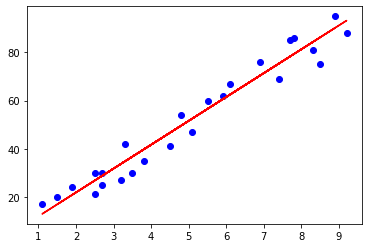

In [15]:
# Plotting for the test data
plt.plot(x_arr,y_arr, 'bo')
plt.plot(x_arr,line,'red')
plt.show()

### **Making Predictions**

In [16]:
hours_predict=lr.predict(x_test)
hours_predict

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [19]:
#testing with values
hours = (9.25,8,10,11)
own_pred = lr.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = (9.25, 8, 10, 11)
Predicted Score = [[ 93.69173249]
 [ 81.30341189]
 [101.12472485]
 [111.03538133]]


### **Evaluating the model**

In [20]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, hours_predict)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, hours_predict)) 

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
